# Use K Means to compress color spaces of images

One common example of K Means Clustering is to compress the colour spaces of images. An image usually comes with a 24-bit colour depth, meaning 2^24 = 16,777,216 colour variations.

K Means can be used to organize the colour variations into the their respective colour clusters. The "K" (number of cluster) here will be the the number of colour space. If K is set to 8, the available colour space is 8. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read your image by using OpenCV and load it into a OpenCV-interpretable numpy array.

In [2]:
import cv2
image = cv2.imread("data/cat.jpg", cv2.IMREAD_COLOR)

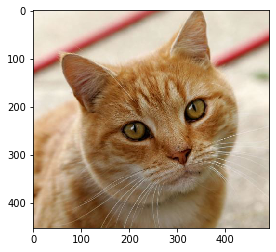

In [3]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

Show the dimension of the input picture, (Height, Width, Depth)

In [4]:
image.shape

(453, 492, 3)

Every colour channel has 256 possible values, the number of possible colours is 256 * 256 * 256 = 16,777,216, approx 16 million colours. Let us reduce the color space from 16 million to 8 colours.

In [5]:
image_scaled = image / 255.0 # use 0...1 scale
image_scaled = image_scaled.reshape((-1, 3))
image_scaled.shape

(222876, 3)

In [6]:
from sklearn.cluster import KMeans 
num_clusters = 8
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)


In [ ]:
model.fit(image_scaled.astype(np.float32))

Get the: 
- cluster_centers_ : Coordinates of cluster centers.
- labels_ : Labels of each point
- inertia_ : Sum of squared distance from each point to their corresponding center

In [ ]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

The generated clusters corresponds to the 8 colors of our reduced color palette.

Visual inspection of the centroids array shows that all colours have three channels (B, G, R) with values ranging between 0 and 1.

In [ ]:
centroids

The labels will equal to the number of clusters that we have set.

In [ ]:
np.unique(labels)

These 8 colours correspond to the 8 cluster labels contained in the labels vector.

We want all our data points with label 0 to be colored according to row 0 in the centers array whereas all data points with label 1 to be colored according to row 1 in the centers array and same for other labels.

We use labels as an index into the centroids array which is also represents our new colours.

In [ ]:
new_colours = centroids[labels].reshape((-1, 3))

In [ ]:
image_compressed = new_colours.reshape(image.shape)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_compressed, cv2.COLOR_BGR2RGB));
plt.title('8 Colour Image')

Let try to do another round of color space compression but this time we only manipulate the 1 channel colour space.

In [ ]:
import cv2
image = cv2.imread("data/cat.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))

In [ ]:
image.shape

Scale the pixel values into a range of 0 to 1.

In [ ]:
image_scaled = image / 255.0 
image_scaled = image_scaled.reshape((-1, 1))
image_scaled.shape

In [ ]:
image_scaled

In [ ]:
from sklearn.cluster import KMeans 
num_clusters = 4
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [ ]:
model.fit(image_scaled.astype(np.float32))

In [ ]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

In [ ]:
centroids

In [ ]:
new_colours = centroids[labels].reshape((-1, 1))

In [ ]:
image_compressed = new_colours.reshape(image.shape)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_compressed, cv2.COLOR_GRAY2RGB));
plt.title('4 Colour Image')